In [56]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
breast = pd.read_csv("breast cancer.csv")

In [59]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [60]:
breast.shape

(569, 33)

In [61]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [62]:
breast.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [63]:
# 3. Data Cleaning (Crucial Step for 10/10)
# Drop 'Unnamed: 32' (empty) and 'id' (noise - creates overfitting)
breast.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [64]:
# 4. Encoding Target Variable
# Transforms 'M' (Malignant) to 1 and 'B' (Benign) to 0
le = LabelEncoder()

In [65]:
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

In [66]:
# 5. Feature Selection
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']

In [67]:
# 6. Train-Test Split with Stratification
# 'stratify=y' ensures the ratio of Cancer/No-Cancer is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [68]:
# 7. Scaling (Best Practice)
# Fit ONLY on Training data, then transform both. This prevents data leakage.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# 8. Model Training
# Increased max_iter to ensure convergence
lr = LogisticRegression(max_iter=5000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [70]:
# 9. Evaluation
y_pred = lr.predict(X_test)

In [71]:
print("--- Single Split Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report (Check Recall for Malignant!):")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

--- Single Split Performance ---
Accuracy: 0.9649

Classification Report (Check Recall for Malignant!):
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



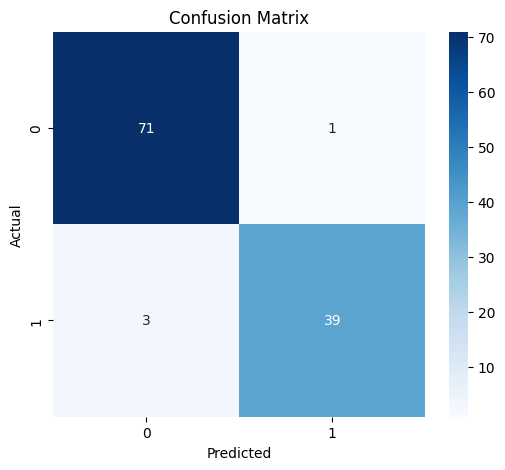

In [72]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
[
    12.45, 15.70, 82.57, 477.1, 0.0858, 0.0589, 0.0353, 0.0226, 0.1782, 0.0621,
    0.245, 1.041, 1.502, 19.6, 0.0071, 0.0132, 0.0148, 0.0057, 0.0195, 0.0021,
    14.10, 19.85, 92.20, 599.4, 0.1231, 0.1046, 0.0902, 0.0394, 0.2751, 0.0802
],
[
        17.99, 10.38, 122.80, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
        1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
        25.38, 17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
    ]

In [80]:
def predict_cancer():
    """
    Uses internally defined patient data,
    scales it using the training scaler,
    and prints a diagnosis.
    """

    patient_data = [
    12.45, 15.70, 82.57, 477.1, 0.0858, 0.0589, 0.0353, 0.0226, 0.1782, 0.0621,
    0.245, 1.041, 1.502, 19.6, 0.0071, 0.0132, 0.0148, 0.0057, 0.0195, 0.0021,
    14.10, 19.85, 92.20, 599.4, 0.1231, 0.1046, 0.0902, 0.0394, 0.2751, 0.0802
]

    data_df = pd.DataFrame([patient_data], columns=X.columns)
    data_scaled = scaler.transform(data_df)
    prediction = lr.predict(data_scaled)

    if prediction[0] == 1:
        print("Malignant (Cancerous)")
    else:
        print("Benign (Not Cancerous)")


In [81]:
predict_cancer()

Benign (Not Cancerous)
